![](https://i.imgur.com/JsMvGnP.png)

## Projeto - Classificação

## 1. Considerações iniciais

Neste notebook vamos praticar a construção de um modelo de Machine Learning. Mais especificamente, iremos utilizar um algoritmo para realizar um processo de classificação. Propositalmente, evitaremos adentrar em algoritmos e explicações mais complexas, pois o foco é percorrer o fluxo do Aprendizado de Máquina por inteiro, ou o máximo dele.

### 1.1. O Problema de Negócio

A _churn rate_ (taxa de rotatividade ou cancelamento) é a porcentagem de assinantes de um serviço que interrompe suas assinaturas dentro de um determinado período de tempo. Para uma empresa expandir sua clientela, sua taxa de crescimento, medida pelo número de novos clientes, deve exceder sua taxa de cancelamento (_churn rate_).

Portanto, neste projeto, um banco deseja que você construa um modelo de Machine Learning que possa prever a probabilidade de seus clientes atuais fecharem suas contas em um futuro próximo e, portanto, calcular sua _churn rate_.

Esse é um problema de classificação no qual você classifica se um cliente irá sair (y=1) ou permanecer (y=0) com base diversos atributos.

### 1.2. Descrição do dados

No arquivo *Churn_Modelling.csv* você encontrará:
- **RowNumber**: id do registro/linha.
- **CustomerId**: identificador único do cliente.
- **Surname**: sobrenome do cliente.
- **CreditScore**: pontuação de crédito do cliente.
- **Geography**: país de origem do cliente.
- **Gender**: sexo do cliente.
- **Age**: idade do cliente.
- **Tenure**: número de anos em que o cliente está com o banco.
- **Balance**: saldo bancário.
- **NumOfProducts**: número de produtos que o cliente utiliza.
- **HasCrCard**: indica se o cliente tem (1) ou não tem (0) cartão de crédito.
- **IsActiveMember**: indica se o cliente é (1) ou não é (0) ativo no banco.
- **EstimatedSalary**: salário estimado em dólares.
- **Exited**: indica se o cliente encerrou (1) a conta no banco ou se o cliente foi retido (0).


### 1.3 Métricas de Avaliação

Avalie seu modelo utilizando as métricas Acurácia e AUC (area under the ROC) estudadas nos módulos anteriores.

Trabalhe até conseguir uma acurácia acima e 85%.

## 2. Etapas do Projeto

Neste projeto você poderá seguir o fluxo que preferir, mas como sugestão pode seguir as seguintes etapas:
1. Análise exploratória 
2. Preparação e limpeza dos dados
3. Seleção de atributos
4. Construção do modelo
5. Avaliação do modelo
6. Otimização do modelo

Lembrando que esses passos, provavelmente, serão executados várias vezes até se obter um resultado satisfatório.

Sugestões de modelos:
* Logistic Regression Classification
* K-Nearest Neighbour (KNN) Classification
* Support Vector Machine (SVM) Classification
* Naive Bayes Classification
* Decision Tree Classification
* Random Forest Classification

Em caso de dúvidas, não esqueça de conversar com seu mentor.

## 3. Desenvolvimento do Projeto
*Adicione células você precisar para cada etapa*

### 3.1 Análise exploratória

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("Churn_Modelling.csv")

df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
df.tail(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9985,9986,15586914,Nepean,659,France,Male,36,6,123841.49,2,1,0,96833.00,0
9986,9987,15581736,Bartlett,673,Germany,Male,47,1,183579.54,2,0,1,34047.54,0
9987,9988,15588839,Mancini,606,Spain,Male,30,8,180307.73,2,1,1,1914.41,0
9988,9989,15589329,Pirozzi,775,France,Male,30,4,0.00,2,1,0,49337.84,0
9989,9990,15605622,McMillan,841,Spain,Male,28,4,0.00,2,1,1,179436.60,0
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0


In [4]:
df.index

RangeIndex(start=0, stop=10000, step=1)

In [5]:
df.shape

(10000, 14)

In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
list (df.columns)

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

### 3.2 Preparação e limpeza dos dados

In [10]:
df.drop('RowNumber',axis=1, inplace=True)

In [11]:
df.drop('CustomerId',axis=1, inplace=True)

In [12]:
df.drop('Surname',axis=1, inplace=True)

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
df2 = pd.get_dummies(df)
df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [17]:
df.shape

(10000, 11)

In [18]:
df2.shape

(10000, 14)

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_France   10000 non-null  uint8  
 10  Geography_Germany  10000 non-null  uint8  
 11  Geography_Spain    10000 non-null  uint8  
 12  Gender_Female      10000 non-null  uint8  
 13  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 752.1 KB


In [20]:
df2.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501400,0.250900,0.247700,0.454300,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.433553,0.431698,0.497932,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3.3 Seleção de atributos

In [21]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

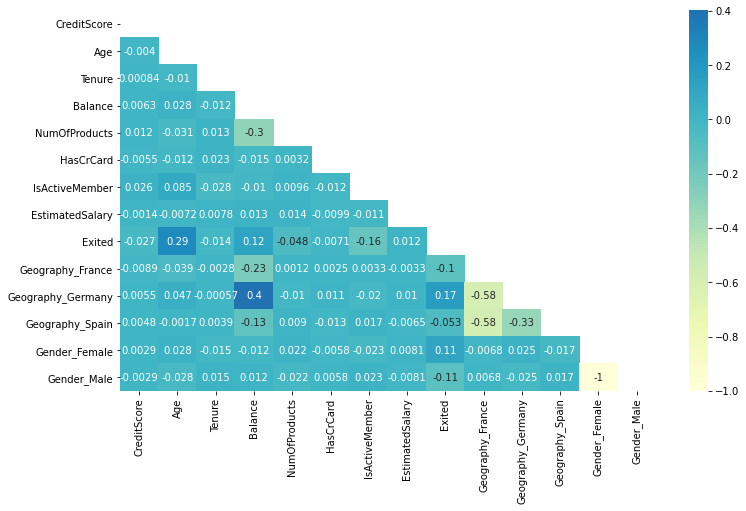

In [27]:
corr=df2.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,7))
sns.heatmap(df2.corr(), mask = mask, annot=True, center=0, cmap="YlGnBu")

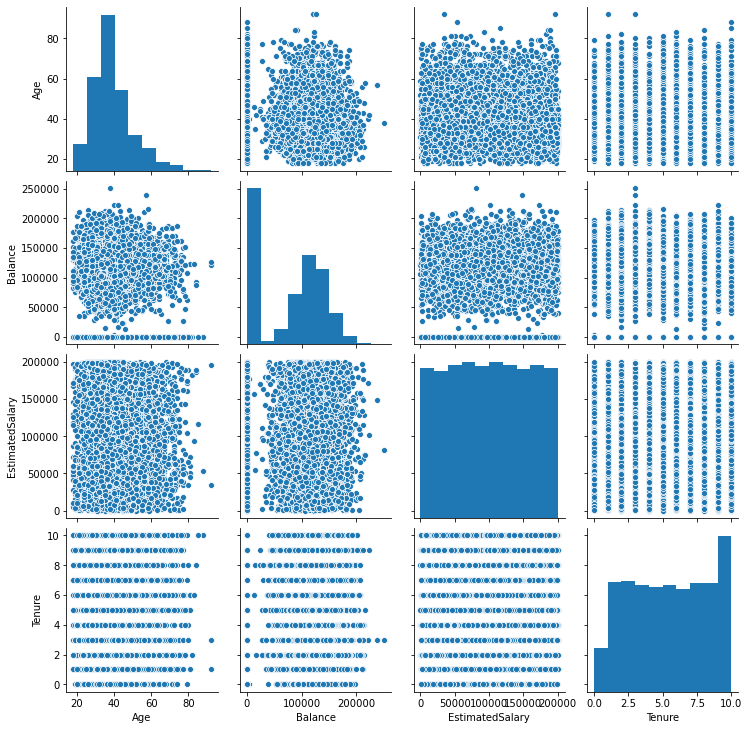

In [28]:
variaveis = ['Age', 'Balance', 'EstimatedSalary', 'Tenure']
sns.pairplot(df2[variaveis])

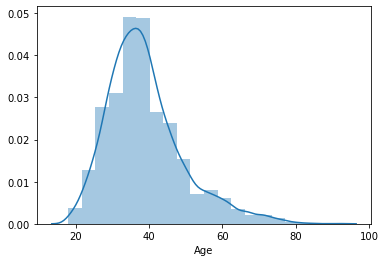

In [30]:
sns.distplot(df2.Age,bins=20)

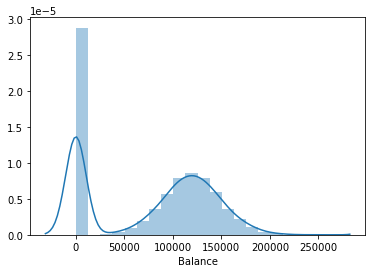

In [31]:
sns.distplot(df2.Balance,bins=20)

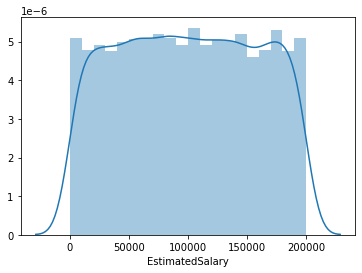

In [32]:
sns.distplot(df2.EstimatedSalary,bins=20)

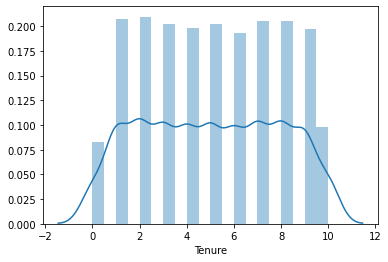

In [33]:
sns.distplot(df2.Tenure,bins=20)

### 3.4 Construção do modelo

In [35]:
df2[df2.columns.difference(['Exited'])].columns

Index(['Age', 'Balance', 'CreditScore', 'EstimatedSalary', 'Gender_Female',
       'Gender_Male', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'HasCrCard', 'IsActiveMember', 'NumOfProducts',
       'Tenure'],
      dtype='object')

In [36]:
df_filtrado = df2[(df2['CreditScore']<800) & (df2['Age']<60)]
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8857 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        8857 non-null   int64  
 1   Age                8857 non-null   int64  
 2   Tenure             8857 non-null   int64  
 3   Balance            8857 non-null   float64
 4   NumOfProducts      8857 non-null   int64  
 5   HasCrCard          8857 non-null   int64  
 6   IsActiveMember     8857 non-null   int64  
 7   EstimatedSalary    8857 non-null   float64
 8   Exited             8857 non-null   int64  
 9   Geography_France   8857 non-null   uint8  
 10  Geography_Germany  8857 non-null   uint8  
 11  Geography_Spain    8857 non-null   uint8  
 12  Gender_Female      8857 non-null   uint8  
 13  Gender_Male        8857 non-null   uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 735.2 KB


### 3.5 Avaliação do modelo

In [40]:
df_lg = df_filtrado.copy()
df_lg['EstimatedSalary'] = df_lg['EstimatedSalary'].apply(np.log1p)
df_lg['Balance'] = df_lg['Balance'].apply(np.log1p)

In [41]:
train,test = train_test_split(df_lg, test_size=0.2, random_state=100)
X_cols = ['Age', 'Balance', 'CreditScore', 'EstimatedSalary', 'Gender_Female', 'Geography_France', 'Geography_Germany', 'HasCrCard', 'IsActiveMember', 'NumOfProducts','Tenure']
X_train, X_test = train[X_cols], test[X_cols]
y_train, y_test = train['Exited'], test['Exited']
reg = RandomForestClassifier()
reg.fit(X_train, y_train)

RandomForestClassifier()

### 3.4 Otimização do modelo

In [42]:
print(f'teste: {reg.score(X_test, y_test)}')
if reg.score(X_test, y_test)>0.85:
  print('SHOW!!!!!!')
else:
  print('Melhora isso aí')  

teste: 0.8515801354401806
SHOW!!!!!!


In [ ]:
# seu código

## 4. Conclusão
O fluxo de trabalho de Aprendizado de Máquina não termina após avaliação de performance do modelo escolhido. Na verdade, esta seria somente a primeira iteração de um processo que pode ter dezenas de tentativas.

Encorajamos você a repetir novamente o processo descrito neste notebook. Contudo, explorando novas possibilidades para verificar a melhora/piora da performance do seu modelo. Você pode remover variáveis/atributos menos importantes, normalizar variáveis importantes, escolher outros algoritmos de aprendizagem supervisionada, etc. O Aprendizado de Máquina é uma área interessante justamente por causa disto. Você testa, você erra, você recomeça.